In [18]:
import numpy as np

from keras.datasets import mnist
from keras.layers   import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models   import Model, Sequential

import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype( 'float32') / 255.
x_train = np.reshape( x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape( x_test,  (len(x_test), 28, 28, 1))
input_shape = x_train.shape[1:]
print x_train.shape
print x_test.shape

(60000, 28, 28, 1)
(10000, 28, 28, 1)


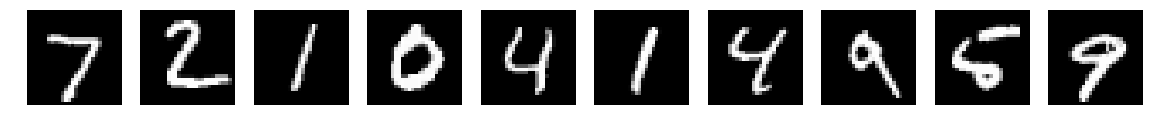

In [10]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 2))
for i in range(n):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow( x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

In [23]:
ae_model1 = Sequential()
# encoder
ae_model1.add( Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=input_shape))
ae_model1.add( MaxPooling2D(pool_size=(2, 2)))
# decoder
ae_model1.add( Conv2D( 1, (3, 3), activation='relu', padding='same'))
ae_model1.add( UpSampling2D((2,2)))

ae_model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 1)         145       
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 28, 28, 1)         0         
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


In [25]:
ae_model1.compile( optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
ae_model1.fit( x_train, x_train,
               epochs=50,
               batch_size=128,
               shuffle=True,
               validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 25s 411us/step - loss: 0.1593 - val_loss: 0.1156
Epoch 2/50
60000/60000 [==============================] - 24s 396us/step - loss: 0.1151 - val_loss: 0.1130
Epoch 3/50
60000/60000 [==============================] - 24s 396us/step - loss: 0.1136 - val_loss: 0.1123
Epoch 4/50
60000/60000 [==============================] - 24s 397us/step - loss: 0.1128 - val_loss: 0.1119
Epoch 5/50
44544/60000 [=====================>........] - ETA: 5s - loss: 0.1123